In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load the data
diabetes = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df.shape

(768, 9)

In [36]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# a) Random sample of 25 observations
np.random.seed(42)  # Setting seed for reproducibility
sample_25 = diabetes.sample(n=25, random_state=42)

In [21]:
# Calculate statistics for Glucose
pop_glucose_mean = diabetes['Glucose'].mean()
sample_glucose_mean = sample_25['Glucose'].mean()
pop_glucose_max = diabetes['Glucose'].max()
sample_glucose_max = sample_25['Glucose'].max()

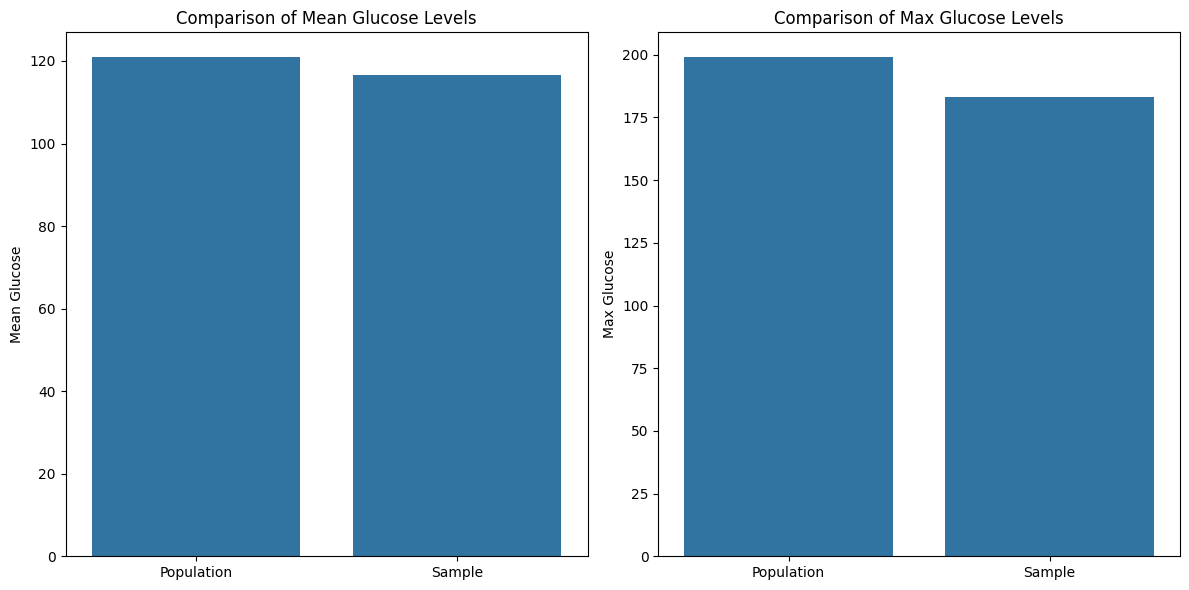

In [22]:
# Create comparison charts for Glucose
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=['Population', 'Sample'], y=[pop_glucose_mean, sample_glucose_mean])
plt.title('Comparison of Mean Glucose Levels')
plt.ylabel('Mean Glucose')

plt.subplot(1, 2, 2)
sns.barplot(x=['Population', 'Sample'], y=[pop_glucose_max, sample_glucose_max])
plt.title('Comparison of Max Glucose Levels')
plt.ylabel('Max Glucose')
plt.tight_layout()
plt.show()

The sample mean and max Glucose values will likely be close to but not exactly the same as the population values.

The charts will show how representative your 25-observation sample is of the entire population.

In [23]:
# b) 98th percentile of BMI
pop_bmi_98 = np.percentile(diabetes['BMI'], 98)
sample_bmi_98 = np.percentile(sample_25['BMI'], 98)

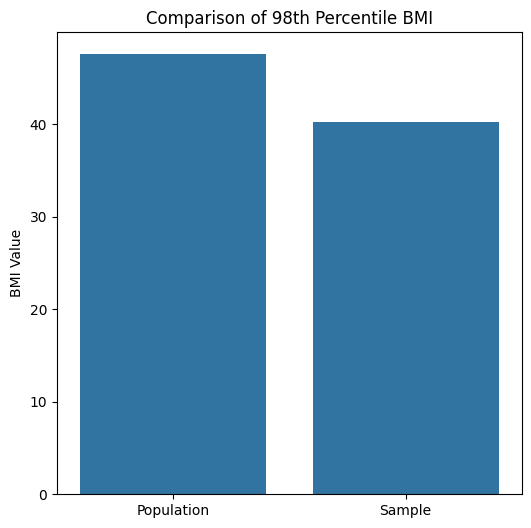

In [24]:
# Create comparison chart for BMI
plt.figure(figsize=(6, 6))
sns.barplot(x=['Population', 'Sample'], y=[pop_bmi_98, sample_bmi_98])
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Value')
plt.show()

The sample's 98th percentile BMI will be compared to the population's value.

With only 25 observations, the sample percentile might differ more from the population value than with larger samples.

In [27]:
# c) Bootstrap with 500 samples of 150 observations each
bootstrap_means = []
bootstrap_stds = []
bootstrap_90th = []
for _ in range(500):
    bootstrap_sample = diabetes.sample(n=150, replace=True)
    bootstrap_means.append(bootstrap_sample['BloodPressure'].mean())
    bootstrap_stds.append(bootstrap_sample['BloodPressure'].std())
    bootstrap_90th.append(np.percentile(bootstrap_sample['BloodPressure'], 90))

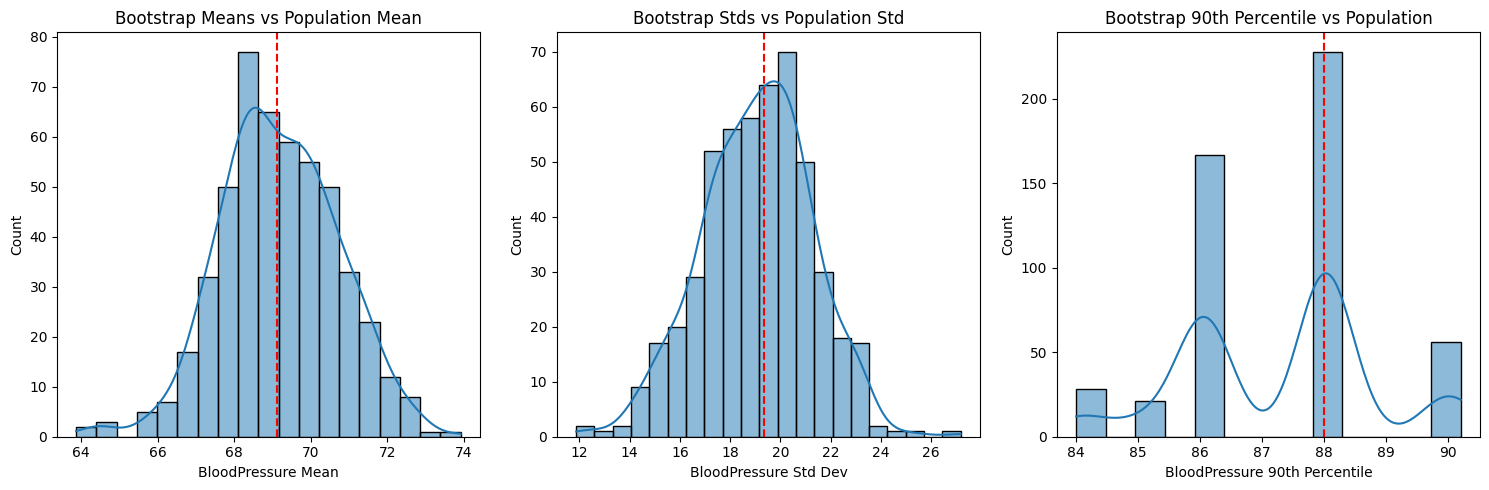

In [30]:
# Create comparison charts
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(bootstrap_means, kde=True)
plt.axvline(pop_bp_mean, color='r', linestyle='--')
plt.title('Bootstrap Means vs Population Mean')
plt.xlabel('BloodPressure Mean')

plt.subplot(1, 3, 2)
sns.histplot(bootstrap_stds, kde=True)
plt.axvline(pop_bp_std, color='r', linestyle='--')
plt.title('Bootstrap Stds vs Population Std')
plt.xlabel('BloodPressure Std Dev')

plt.subplot(1, 3, 3)
sns.histplot(bootstrap_90th, kde=True)
plt.axvline(pop_bp_90th, color='r', linestyle='--')
plt.title('Bootstrap 90th Percentile vs Population')
plt.xlabel('BloodPressure 90th Percentile')

plt.tight_layout()
plt.show()

The 500 bootstrap samples will show the sampling distribution of the mean, standard deviation, and 90th percentile.

The red dashed lines in the charts represent the population values for comparison.

The bootstrap averages should be very close to the population parameters, demonstrating the power of bootstrap resampling.

The histograms will show the variability of these statistics across different samples.

In [31]:
# Report findings
print("Bootstrap Results vs Population:")
print(f"Average bootstrap mean: {np.mean(bootstrap_means):.2f} vs population mean: {pop_bp_mean:.2f}")
print(f"Average bootstrap std: {np.mean(bootstrap_stds):.2f} vs population std: {pop_bp_std:.2f}")
print(f"Average bootstrap 90th percentile: {np.mean(bootstrap_90th):.2f} vs population: {pop_bp_90th:.2f}")

Bootstrap Results vs Population:
Average bootstrap mean: 69.18 vs population mean: 69.11
Average bootstrap std: 19.07 vs population std: 19.36
Average bootstrap 90th percentile: 87.25 vs population: 88.00


In [33]:

# Print summary
print(bootstrap_summary)

         Statistic  Bootstrap  Population
0             Mean   69.17696   69.105469
1          Std Dev   19.08274   19.355807
2  98th Percentile   97.92404   99.320000
